# History-Based Regression

# RNN's

[Documentation on PyTorch's Website](https://pytorch.org/docs/stable/nn.html)

[LSTM's tutorial](https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html)

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

seed = 42 # Allows exactly reproducible experiments
np.random.seed(seed)
torch.manual_seed(seed)
# Can also fix Python's random library

In [24]:
# Pytorch LSTM's can take a single input, hidden_state pair at a time, or an entire sequence.
# For simplicity, we will design our network's forward operations to operate on the entire sequence at once.
# The only reason to do otherwise would be if you want to pass information to an earlier part of the network in the next timestep.

class SimpleRNN(torch.nn.Module):
    
    #Our batch shape for input x is (3, 32, 32)
    
    def __init__(self, breadth=100):
        super(SimpleRNN, self).__init__()
        
        # Process each input (mapping from 1 to breadth)
        self.fc1 = torch.nn.Linear(1, breadth)
        
        #Use an LSTM to process the features and create some history-updated information
        hidden_size = breadth # Heuristic for amount of information to output & preserve across time
        self.lstm = nn.LSTM(breadth, hidden_size)
        
        #Use a final layer to map back down to a single output
        self.fc2 = torch.nn.Linear(breadth, 1)
        
    def forward(self, sequence):
        # Assumes (in view) that only a single training example is passed.
        # This is for illustration purposes.
        
        #Computes the activation of the first fully connected layer
        inputs = F.relu(self.fc1(sequence)) # applies operation to each input in the sequence.
        hidden_sequence, (last_output, last_memory_state) = self.lstm(inputs.view(len(sequence), 1, -1)) # For every timestep, for this one training instance, there is a set of input features (of size breadth)
        #print("hidden", hidden_sequence)
        #print("last", last_output)
        final_result = self.fc2(last_output.view(1, -1)) # Assumes a single training example
        return(final_result)

In [25]:
test_input = Variable(torch.from_numpy(np.array([0, 1, 2, 3]).astype(np.float32)))
net=SimpleRNN()
outputs = net(test_input.view(len(test_input), 1, -1))
print(outputs)

tensor([[-0.1079]], grad_fn=<AddmmBackward>)


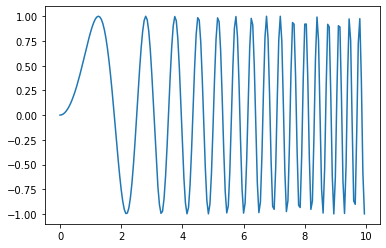

tensor([0.0000, 0.0500, 0.1000, 0.1500, 0.2000, 0.2500, 0.3000, 0.3500, 0.4000,
        0.4500]) tensor(0.5000)
tensor([0.3000, 0.3500, 0.4000, 0.4500]) tensor(0.5000)


In [31]:
inputs = Variable(torch.arange(0,10,.05)) # 200 points
#true_vals = torch.mul(inputs, inputs)
true_vals = torch.sin(inputs * inputs)

plt.plot(list(inputs.data), list(true_vals.data))
plt.show()

training_cutoff = len(inputs)//2 # A good idea to separate train and test

# The following are examples:
example_sequence_input = inputs[:10]
example_sequence_output = inputs[10]
print(example_sequence_input, example_sequence_output)

example_fixed_history_input = inputs[6:10]
example_fixed_history_output = inputs[10]
print(example_fixed_history_input, example_fixed_history_output)

# Assignment:
1. Train the RNN to predict the function from sequences. Plot predictions on test data (beyond the end of the sequence).
2. Implement a fixed-history regression.
3. Compare the performance of the two algorithms.

# Stretch Goals:
- Test the networks on other functions, including a simple sine wave and a quadratic function